In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import reactivity
import fusionlib
import exceptions

Loading reactivity cache...
Loaded T(d,n)4He cache with 7998 values
Loaded D(d,p)T cache with 7998 values
Loaded D(d,n)3He cache with 7998 values
Loaded 3He(d,p)4He cache with 7998 values
Loaded 11B(p,4He)4He4He cache with 7998 values


### Bosch and Hale reactivity recreate Table VIII

In [34]:
# Create list of temperatures on log scale
sample_temperature_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                             1.3, 1.5, 1.8, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0,
                             8.0, 10, 12, 15, 20, 30, 40, 50]

#reactions = ['T(d,n)4He', '3He(d,p)4He', 'D(d,p)T', 'D(d,n)3He']
reactions = ['T(d,n)4He', 'D(d,p)T', 'D(d,n)3He']
# Note that Bosch and Hale show out of stated range reactivites for '3He(d,p)4He'
# so we do not show that column here.

for reaction in reactions:  
    df = pd.DataFrame(sample_temperature_values, columns = ['Temperature'])

for reaction in reactions:
    df[reaction] = df.apply(
                       lambda row: format(reactivity.reactivity(T_i=row['Temperature'],
                                                     reaction=reaction,
                                                     method='parameterized',
                                                     use_cache=False),
                                          '0.3e'),
                       axis=1,
                   )
df

,Temperature,"T(d,n)4He","D(d,p)T","D(d,n)3He"
0,0.2,1.254e-32,4.640e-34,4.482e-34
1,0.3,7.292e-31,2.071e-32,2.004e-32
2,0.4,9.344e-30,2.237e-31,2.168e-31
3,0.5,5.690e-29,1.180e-30,1.152e-30
4,0.6,2.253e-28,4.321e-30,4.200e-30
5,0.7,6.740e-28,1.193e-29,1.162e-29
6,0.8,1.662e-27,2.751e-29,2.681e-29
7,0.9,3.560e-27,5.558e-29,5.424e-29
8,1.0,6.857e-27,1.017e-28,9.933e-29
9,1.3,3.174e-26,4.143e-28,4.062e-28


### Check integrated reactivites against parameterized reactivities

In [39]:
log_temperature_values = np.logspace(math.log10(0.2), math.log10(10000), 100)
sigma_v_df = pd.DataFrame(log_temperature_values, columns = ['Temperature'])

#reactions = ['T(d,n)4He', '3He(d,p)4He', 'D(d,p)T', 'D(d,n)3He']
reactions = ['T(d,n)4He', 'D(d,p)T', 'D(d,n)3He']
methods = ['parameterized', 'integrated']

#for reaction in reactions:  
df = pd.DataFrame(log_temperature_values, columns = ['Temperature'])

def reactivity_wrapper(*args, **kwargs):
    try:
        r = reactivity.reactivity(*args, **kwargs)
    except (exceptions.ReactivityTemperatureTooHighError,
            exceptions.ReactivityTemperatureTooHighError):
        r = None
    return r

for reaction in reactions:
    for method in methods:
        df[reaction + ' ' + method] = df.apply(
            lambda row: reactivity_wrapper(T_i=row['Temperature'],
                                           reaction=reaction,
                                           method=method,
                                           use_cache=False),
            axis=1,
        )
df

,Temperature,"T(d,n)4He parameterized","T(d,n)4He integrated","D(d,p)T parameterized","D(d,p)T integrated","D(d,n)3He parameterized","D(d,n)3He integrated"
0,0.200000,1.253978e-32,3.020364e-35,4.640468e-34,1.544119e-37,4.482264e-34,2.261315e-37
1,0.223097,3.971439e-32,4.659406e-34,1.364230e-33,2.819529e-36,1.318301e-33,3.903451e-36
2,0.248862,1.204320e-31,1.192516e-31,3.849093e-33,3.747127e-35,3.721276e-33,4.932753e-35
3,0.277602,3.502392e-31,3.472905e-31,1.043795e-32,3.745681e-34,1.009651e-32,4.713092e-34
4,0.309662,9.783338e-31,9.714491e-31,2.724437e-32,2.662420e-32,2.636776e-32,2.591339e-32
...,...,...,...,...,...,...,...
95,6458.663023,NaN,6.052712e-23,NaN,5.954043e-23,NaN,6.443573e-23
96,7204.551822,NaN,5.339693e-23,NaN,5.308756e-23,NaN,5.737567e-23
97,8036.580755,NaN,4.693926e-23,NaN,4.710858e-23,NaN,5.085253e-23
98,8964.697850,NaN,4.112751e-23,NaN,4.162174e-23,NaN,4.488099e-23


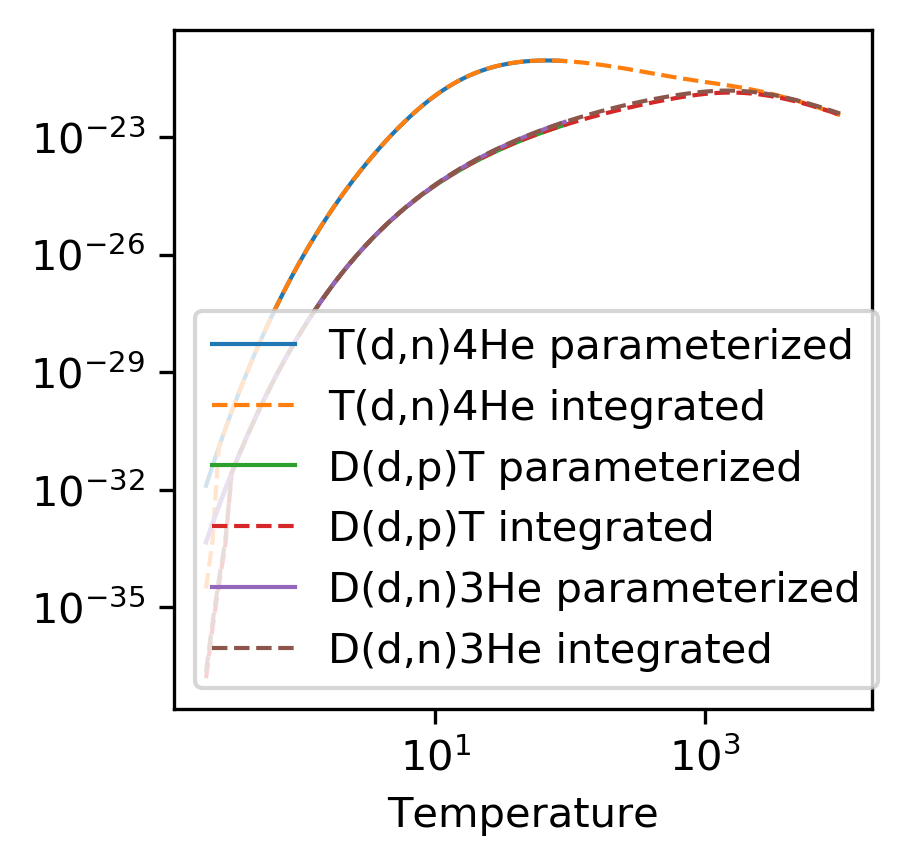

In [37]:
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(3,3)
df.plot(x='Temperature',
        y=['T(d,n)4He parameterized', 'T(d,n)4He integrated',
           'D(d,p)T parameterized', 'D(d,p)T integrated',
           'D(d,n)3He parameterized', 'D(d,n)3He integrated'],
        linewidth=1,
        style=['-', '--', '-', '--','-', '--'],
        logy=True,
        logx=True,
        ax=ax)
#ax.set_xlim(0.2, 1000)
#ax.grid('on', which='both', axis='both')
#ax.set_ylim(1e-25, 1e-21)
#ax.set_ylim(0, 5e-22)
#ax.legend(reaction_legend_dict.values(), prop={'size': 6}, loc='lower right')

#ax.legend([legend_dict[l] for l in ax.get_legend_handles_labels()[1]])

#ax.set_xlabel(r'$T_{i} \; \si{(keV)}$')
#ax.set_ylabel(r'$\langle \sigma v \rangle \; \si{(\meter^{3} \second^{-1})}$ ')
fig.savefig(os.path.join('images', 'reactivity_check.png'), bbox_inches='tight')

(1, 10000.0)

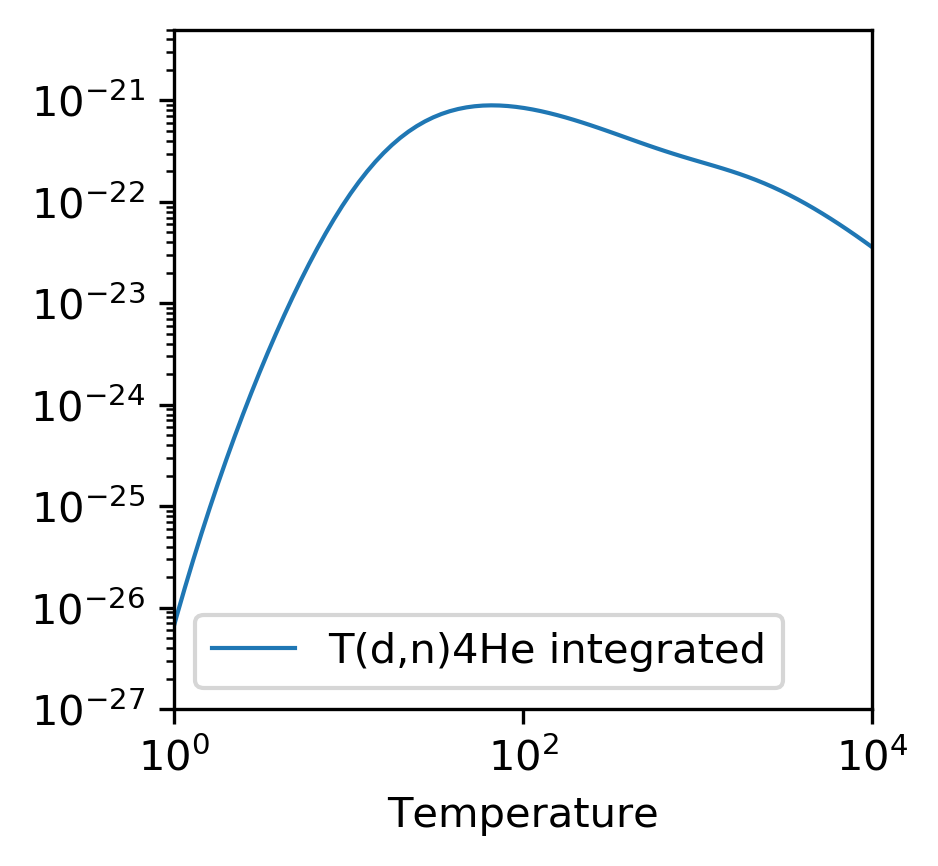

In [35]:
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(3,3)
df.plot(x='Temperature',
        y=['T(d,n)4He integrated'],
        linewidth=1,
        style=['-', '--', '-', '--'],
        logy=True,
        logx=True,
        ax=ax)
ax.set_ylim(1e-27, 5e-21)
ax.set_xlim(1, 1e4)

### Check pb11 integrated vs parameterized reactivities [not yet supported]

In [13]:
log_temperature_values = np.logspace(math.log10(0.2), math.log10(500), 100)
sigma_v_df = pd.DataFrame(log_temperature_values, columns = ['Temperature'])

legend_dict = {'integrated_11B(p,4He)4He4He': r'Integrated: $\mathrm{p+B^{11}} \rightarrow \mathrm{3 \alpha}$',
               'parameterized_11B(p,4He)4He4He': r'Parameterized: $\mathrm{p+B^{11}} \rightarrow \mathrm{3 \alpha}$'
              }

#TODO figure out how to get p-11B reactivity at temperature > 500keV
for reaction in legend_dict.keys():
    sigma_v_df[reaction] = sigma_v_df.apply(lambda row:
                                            reactivity._reactivity_integrated(row['Temperature'],
                                                                  reaction=reaction.split('_')[1],
                                                                 ),
                                            axis=1)
#sigma_v_df['sum DD'] = sigma_v_df[['D(d,p)T', 'D(d,n)3He']].sum(axis=1)
sigma_v_df

KeyError: 'm1_keV'